In [56]:
# 1 - Import necessary libraries

import matplotlib.pyplot as plt        #Import relevant libraries. Pandas for dataframes and ploty and matplotlib for visualization. Other libraries just in case.  
import pandas as pd 
import numpy as np
import math
import scipy.stats as stats
import numpy as np
import os 
plt.rcParams['figure.figsize'] = 25, 12 #Increase general size for matplot.lib

In [57]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files

FILE_PATH = r"Downloads/CollegeScorecard_Raw_Data/CollegeScorecard_Raw_Data" # The folder contains files that we do not need, need only merged, created a folder for ease of ease. 
file_names = os.listdir(FILE_PATH)
file_names

['.DS_Store',
 '.ipynb_checkpoints',
 'Crosswalks.zip',
 'data.yaml',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [6]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name

import os, random
Random_file=random.choice(os.listdir("Downloads/CollegeScorecard_Raw_Data/CollegeScorecard_Raw_Data")) #change dir name to whatever")) #change dir name to whatever, obtain random file 
Random_file

'MERGED2009_10_PP.csv'

In [41]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")
# from this file into a data frame aand display use info() function to display a summary information

In [58]:
df = pd.read_csv("Downloads/CollegeScorecard_Raw_Data/CollegeScorecard_Raw_Data/MERGED2009_10_PP.csv") # Upload file from college scoreboard raw data folder, this code reads the file but not every line for spacing. 
df[["INSTNM", "TUITIONFEE_IN"]]                                                                        # Need to make it random so simply grabbed output from previous code (which was random)


C:\Users\jonni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,1351,1365,1377,1378,1407,1408,1411,1426,1431,1432,1433,1445,1446,1447,1537,1538,1539,1540,1541,1542,1547,1548,1549,1553,1554,1559,1560,1561,1562,1563,1567,1568,1571,1572,1573,1574,1606,1609,1610,1611,1613,1614,1615,1616,1636,1637,1711,1723,1724,1729,1909,1910,1911,1912,1913) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,INSTNM,TUITIONFEE_IN
0,Community College of the Air Force,NaN
1,Alabama A & M University,4692.0
2,University of Alabama at Birmingham,5096.0
3,Amridge University,8000.0
4,University of Alabama in Huntsville,6510.0
...,...,...
7212,Southeastern Institute-Nashville,NaN
7213,Make-up Designory,NaN
7214,Dayton School of Medical Massage-Lima,17300.0
7215,Cincinnati School of Medical Massage,17300.0


In [59]:
df.info() #info function 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7217 entries, 0 to 7216
Columns: 1986 entries, UNITID to SCUGFFN_POOLED
dtypes: float64(769), int64(11), object(1206)
memory usage: 109.4+ MB


In [6]:
# 5 - Find out how many observations have missing value.

In [60]:
df[["TUITIONFEE_IN"]].isnull() # Interesting code, but need sum to identify NaN values 

,TUITIONFEE_IN
0,True
1,False
2,False
3,False
4,False
...,...
7212,True
7213,True
7214,False
7215,False


In [61]:
df[["TUITIONFEE_IN"]].isnull().sum() # Output indicates 2750 rows with the null values by using .sum()

TUITIONFEE_IN    2928
dtype: int64

In [9]:
# 6 - Drop those observations with missing value
# Display the number of observations afterward

In [62]:
DF1=df[["INSTNM", "TUITIONFEE_IN"]].dropna() # Pretty Straightforward dropna() drops null values 
DF1

,INSTNM,TUITIONFEE_IN
1,Alabama A & M University,4692.0
2,University of Alabama at Birmingham,5096.0
3,Amridge University,8000.0
4,University of Alabama in Huntsville,6510.0
5,Alabama State University,6468.0
...,...,...
7205,McCann School of Business & Technology,12321.0
7206,McCann School of Business & Technology,12321.0
7214,Dayton School of Medical Massage-Lima,17300.0
7215,Cincinnati School of Medical Massage,17300.0


In [ ]:
# 7 - Find out how many observations have 0 tution.

In [63]:
DF1.isin([0]).sum() # Indicates amount of zeros in dataframe, there are five 


INSTNM           0
TUITIONFEE_IN    5
dtype: int64

In [ ]:
# 8 - Drop those observations with 0 tuition
# Display the number of observations afterward

In [64]:
DF2=DF1[(DF1 != 0).all(1)] # Is accurate, rows with zero are removed 
DF2

,INSTNM,TUITIONFEE_IN
1,Alabama A & M University,4692.0
2,University of Alabama at Birmingham,5096.0
3,Amridge University,8000.0
4,University of Alabama in Huntsville,6510.0
5,Alabama State University,6468.0
...,...,...
7205,McCann School of Business & Technology,12321.0
7206,McCann School of Business & Technology,12321.0
7214,Dayton School of Medical Massage-Lima,17300.0
7215,Cincinnati School of Medical Massage,17300.0


In [ ]:
# 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations

In [65]:
DF_MEAN=DF2.mean()          # I created a dataframe and a numerical mean of the dataframe just in case 
DF_MEAN
print(DF_MEAN)
NUM_MEAN= 12067.689776
print(NUM_MEAN)

TUITIONFEE_IN    12067.689776
dtype: float64
12067.689776


In [ ]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation.

In [66]:
DF2.sample() # Sample of one row from dataframe 

,INSTNM,TUITIONFEE_IN
2139,Copiah-Lincoln Community College,1820.0


In [ ]:
# 11 - Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference

In [67]:
NUM_MEAN-1820 # I could have made this more complicated by generating a list and saving that cleansed number as a variable, however with just one sample this is sufficient 

10247.689776

In [ ]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means

In [68]:
DF_DIFF=DF_MEAN-DF2.sample(10) # I did this using a dataframe, renamed column to make it more clear for the reader 
DF_DIFF
DF_DIFF_1= DF_DIFF.rename(columns={'TUITIONFEE_IN': 'Tuition Mean DIfference'})
DF_DIFF_1

,INSTNM,Tuition Mean DIfference
6883,NaN,6987.689776
3431,NaN,4391.689776
3315,NaN,8515.689776
267,NaN,4647.689776
6742,NaN,-1232.310224
1264,NaN,-9032.310224
3716,NaN,9669.689776
6053,NaN,2419.689776
4510,NaN,7639.689776
4798,NaN,10053.689776


In [ ]:
# 13 - Randomly select 20 observations, display the tuition of these observation.

In [69]:
DF3=DF2.sample(20) # Sample with 20 observations 
DF3

,INSTNM,TUITIONFEE_IN
3653,Ursinus College,38670.0
3443,Clarion University of Pennsylvania,7380.0
4154,Sterling College,23621.0
4622,Coastal Pines Technical College,2043.0
1515,University of the Cumberlands,15658.0
1807,Cape Cod Community College,3456.0
1395,Loras College,25348.0
451,Musicians Institute,27100.0
228,Biola University,27744.0
1128,Illinois Central College,2610.0


In [ ]:
# 14 - Calculate and display the mean tuition of these 20 observations

In [70]:
DF3.mean() # Mean of previous dataframe 

TUITIONFEE_IN    12462.8
dtype: float64

In [ ]:
# 15 - Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference

In [71]:
DF_MEAN-DF3.mean() # I saved the "population mean" earlier as a variable, just substract from previous sample mean to get answer 

TUITIONFEE_IN   -395.110224
dtype: float64

In [ ]:
# 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation
# Describe your hunch/conclusion

In [72]:
DF3=DF2.sample(1) # I tested different samples to get a feel for the difference, other sample sizes are below 
DF3
DF_MEAN-DF3.mean()

TUITIONFEE_IN   -2332.310224
dtype: float64

In [73]:
DF3=DF2.sample(20)
DF3
DF_MEAN-DF3.mean()

TUITIONFEE_IN   -5565.510224
dtype: float64

In [74]:
DF3=DF2.sample(2000) # Outputs appear to be getting smaller, smaller. As expected, increase in samples yields smaller differences in average. 
DF3
DF_MEAN-DF3.mean()  # You can look at the absolute value if you want, differences might be easier to interpret 

TUITIONFEE_IN    221.910776
dtype: float64

In [ ]:
# 17 - write function Code here


In [75]:
def random_mean():                   # General function for this specific dataframe
    RANDOM_SAMPLE= DF2.sample(4195)  # Just generated a mean difference, by taking variables within dataframe  
    
    RAN_MEAN=RANDOM_SAMPLE.mean()
    
    ALL_MEAN=DF2.mean()
    
    diff_mean=ALL_MEAN-RAN_MEAN
    
    print (diff_mean)
    
random_mean()

TUITIONFEE_IN   -18.569342
dtype: float64


In [76]:
random_mean()                     # Based off sample, should small if sample is high 

TUITIONFEE_IN   -17.250629
dtype: float64


In [77]:
sample_sizes = [i for i in range(50)] # Not sure if sample size wanted includes a random selection but this is in fact a sequence of 50 numbers  
sample_sizes[:20]                     # Truncated to show only include 20 numbers, but 50 are there, will adjust 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
# 18 - Create an empty list and name it "means_diff" for differences of population mean and sample means;

In [78]:
sample_sizes = range(10, 500, 10) # I took a different appraoch with the same result, by subtracting from two lists, this sample is relatively small 
                                
sample_means_1 = [DF2["TUITIONFEE_IN"].sample(s).mean() for s in sample_sizes] # Create a list with sample above of means in dataframe 

b=sample_means_1

len(b)                            # Number of sample means 

49

In [79]:
ALL_MEAN=DF2.mean()   #Population mean 

ALL_MEAN              # I took the population mean and made it a list, then I increased its size to match that of the sample means 
a=list(ALL_MEAN)
a

a=a * 49
len(a)

means_diff=[a_i - b_i for a_i, b_i in zip(a, b)] # I subtracted each list to get a list of population means minus sample means 

len(means_diff)

means_diff[:20]

[-3037.7102240896347,
 1647.2897759103653,
 96.68977591036492,
 301.6897759103649,
 -397.55022408963487,
 425.47310924369776,
 2897.8897759103656,
 873.9397759103649,
 1089.6119981325865,
 -361.80022408963487,
 -742.6374968169075,
 350.38144257703243,
 -215.45637793578862,
 -646.5102240896358,
 113.50310924369842,
 1367.5585259103646,
 316.4015406162471,
 14.18422035480944,
 433.5424074893126,
 859.6697759103645]

In [ ]:
# 19 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough

In [80]:
sample_sizes = range(10, 510, 10) #Same procedure as before

sample_means_1 = [DF2["TUITIONFEE_IN"].sample(s).mean() for s in sample_sizes] 

b=sample_means_1

len(b)

50

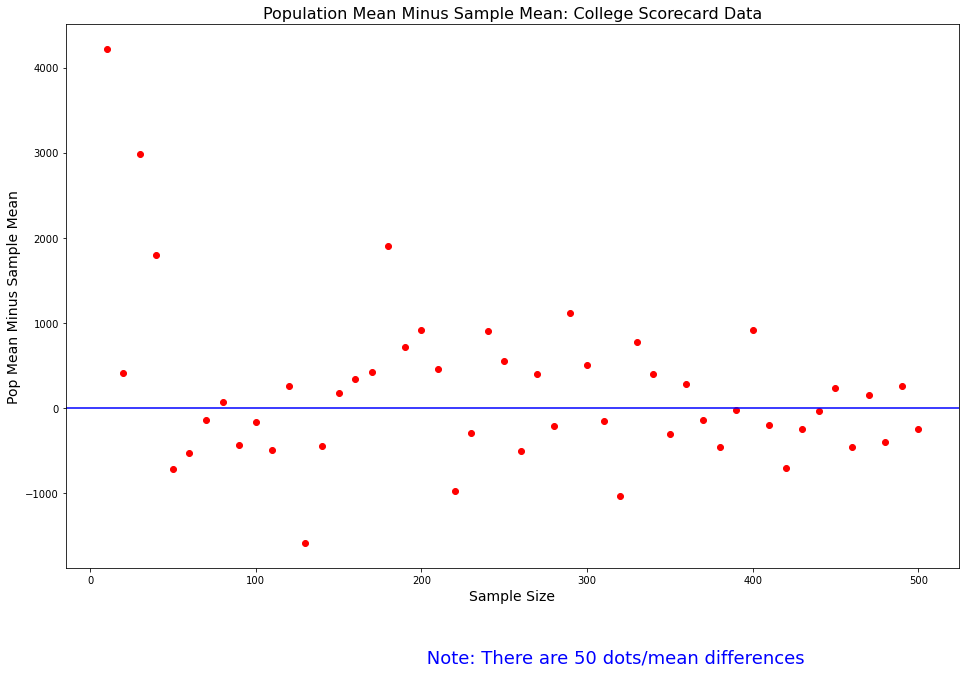

In [82]:
ALL_MEAN=DF2.mean()                              # Redefine population mean 

a=list(ALL_MEAN)                                 # Take two list and subtract them 
a

a=a * 50                                        # Reproduces population mean to match that of the sample mean 

means_diff=[a_i - b_i for a_i, b_i in zip(a, b)] # I subtracted each list to get a list of population means minus sample means 

sample_sizes = range(10, 510, 10)

pop_mean = DF2["TUITIONFEE_IN"].mean()

fig, ax = plt.subplots(figsize=(16,10)) # When you plot this, convergence towards zero doesn't happen yet, as you increase the sample the results will yield zero eventually 

# make a line plot of sample means (y-axis) along sample sizes (x-axis)
ax.scatter(sample_sizes,means_diff, c="r")
ax.text(200,-3000," Note: There are 50 dots/mean differences ", fontsize=18, c="b")     
ax.set_title("Population Mean Minus Sample Mean: College Scorecard Data", size=16)
ax.set_ylabel("Pop Mean Minus Sample Mean", size=14)
ax.set_xlabel("Sample Size", size=14)
plt.axhline(y=0, color='b')

In [250]:
# 20 - repeat steps by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.

In [83]:
sample_sizes = range(10, 4010, 10)

sample_means_1 = [DF2["TUITIONFEE_IN"].sample(s).mean() for s in sample_sizes] 

b=sample_means_1

len(b)

400

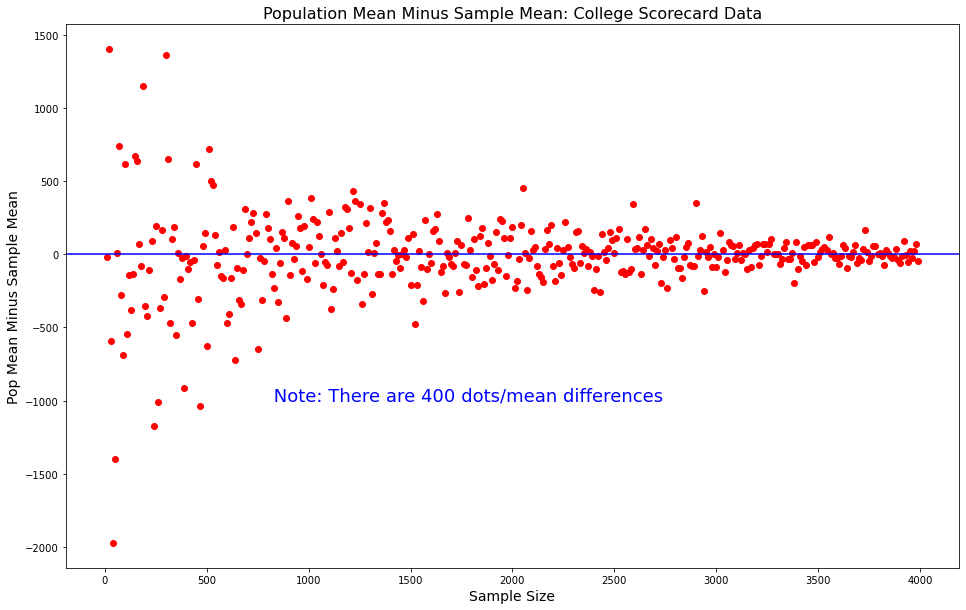

In [84]:
ALL_MEAN=DF2.mean()

ALL_MEAN
a=list(ALL_MEAN)
a

a=a * 399
len(a)

means_diff=[a_i - b_i for a_i, b_i in zip(a, b)]

len(means_diff)

means_diff[:20]

sample_sizes = range(10, 4000, 10)      # As I increased the sample covergence towards zero occurs 

pop_mean = DF2["TUITIONFEE_IN"].mean()  # Population mean - sample mean= zero, after sample means includes all possible samples 

fig, ax = plt.subplots(figsize=(16,10)) # On the plot that is covergence occurs 

# make a line plot of sample means (y-axis) along sample sizes (x-axis)
ax.scatter(sample_sizes,means_diff, c="r") 
ax.text(800,-1000," Note: There are 400 dots/mean differences ", fontsize=18, c="b") 
ax.set_title("Population Mean Minus Sample Mean: College Scorecard Data", size=16)
ax.set_ylabel("Pop Mean Minus Sample Mean", size=14)
ax.set_xlabel("Sample Size", size=14)
plt.axhline(y=0, color='b')

Text(0.5, 0, 'Sample Size')

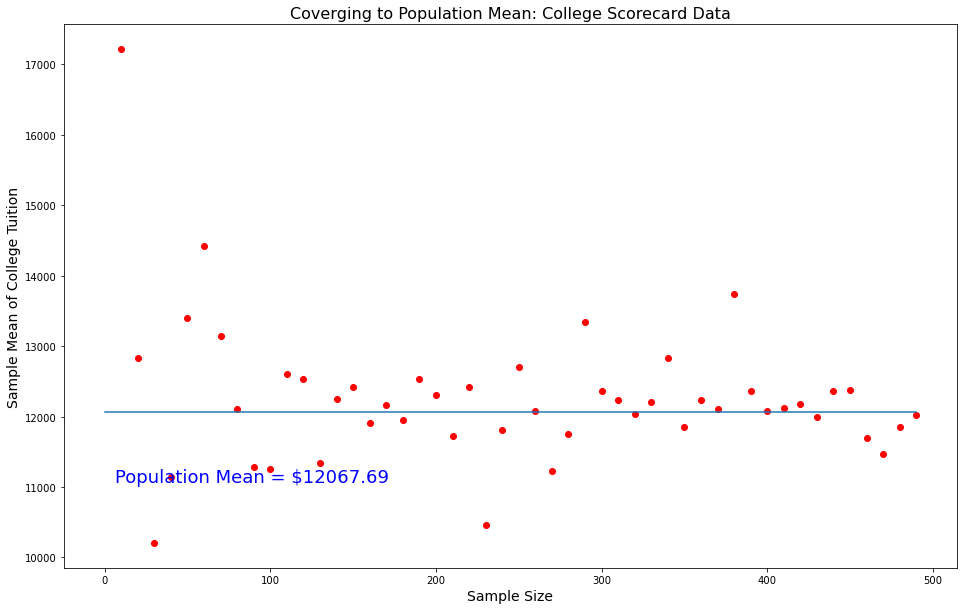

In [85]:
sample_sizes = range(10, 500, 10)

sample_means = [DF2["TUITIONFEE_IN"].sample(s).mean() for s in sample_sizes] 

sample_means[:10] # I thought it would increasing to include population mean as well, covergence is similar 

pop_mean = DF2["TUITIONFEE_IN"].mean()

fig, ax = plt.subplots(figsize=(16,10))

# draw a horizontal line of the population mean                                             
ax.plot((0,sample_sizes[-1]), (pop_mean, pop_mean)) 

# make a line plot of sample means (y-axis) along sample sizes (x-axis)
ax.scatter(sample_sizes, sample_means, c="r") 
ax.text(6, pop_mean - 1000, "Population Mean = $" + str(round(pop_mean,2)), fontsize=18, c="b")                   
ax.set_title("Coverging to Population Mean: College Scorecard Data", size=16)
ax.set_ylabel("Sample Mean of College Tuition", size=14)
ax.set_xlabel("Sample Size", size=14)

Text(0.5, 0, 'Sample Size')

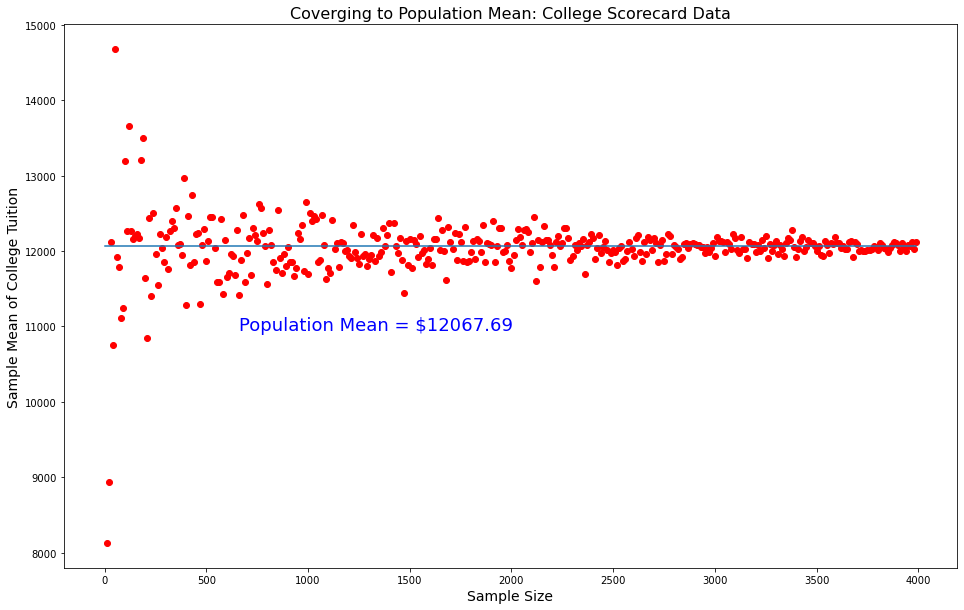

In [86]:
sample_sizes = range(10, 4000, 10)

sample_means = [DF2["TUITIONFEE_IN"].sample(s).mean() for s in sample_sizes] 

sample_means[:10] # Covergence occurs as sample increases 

pop_mean = DF2["TUITIONFEE_IN"].mean()

fig, ax = plt.subplots(figsize=(16,10))

# draw a horizontal line of the population mean                                             
ax.plot((0,sample_sizes[-1]), (pop_mean, pop_mean)) 

# make a line plot of sample means (y-axis) along sample sizes (x-axis)
ax.scatter(sample_sizes, sample_means,c="r") 
ax.text(660, pop_mean-1111, "Population Mean = $" + str(round(pop_mean,2)), fontsize=18, c="b")                   
ax.set_title("Coverging to Population Mean: College Scorecard Data", size=16)
ax.set_ylabel("Sample Mean of College Tuition", size=14)
ax.set_xlabel("Sample Size", size=14)

In [ ]:
# The End 

LINKS

https://stackoverflow.com/questions/701402/best-way-to-choose-a-random-file-from-a-directory
https://github.com/jonnie763/python-stats-dataviz/blob/master/10_LLN_CLT_Dice.ipynb
https://github.com/jonnie763/python-stats-dataviz/blob/master/10_LLN_CTL_college.ipynb
https://github.com/jonnie763/python-stats-dataviz/blob/master/09_Normal_Distribution.ipynb
https://github.com/jonnie763/python-stats-dataviz/blob/master/08_College_Tuition.ipynb